<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/apto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regressão linear com sklearn

In [0]:
import pandas as pd #biblioteca para processamento de dados
import numpy as np #biblioteca para computação científica
import matplotlib.pyplot as plt #gráficos
from sklearn.linear_model import LinearRegression #Modelo de regresão linear
from sklearn.metrics import mean_squared_error, accuracy_score #erro médio quadrático


Qual diretório estou?


In [27]:
!pwd

/content


Qual o conteúdo do diretório corrente?



In [28]:
!ls

apto.csv  sample_data


Faça o download do arquivo apto.csv para o diretório corrente

In [29]:
!wget http://www.linkededucation.com.br/dl/apto.csv

--2020-02-11 23:24:56--  http://www.linkededucation.com.br/dl/apto.csv
Resolving www.linkededucation.com.br (www.linkededucation.com.br)... 186.202.149.227
Connecting to www.linkededucation.com.br (www.linkededucation.com.br)|186.202.149.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121 [application/octet-stream]
Saving to: ‘apto.csv.1’

apto.csv.1          100%[===================>]     121  --.-KB/s    in 0s      

2020-02-11 23:24:57 (25.4 MB/s) - ‘apto.csv.1’ saved [121/121]



In [30]:
!ls

apto.csv  apto.csv.1  sample_data


Carregue o csv em um dataframe do Pandas

In [31]:
df = pd.read_csv('./apto.csv', sep=';')

df.head()

,Area,Quartos,Preco
0,50,2,100
1,80,3,120
2,120,3,170
3,200,3,230
4,70,2,120


Fazer Scatter plot das features x Target observando eventuais relações lineares

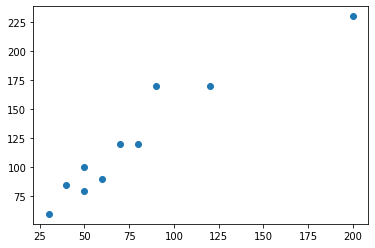

In [32]:
plt.scatter(df['Area'], df['Preco'])
plt.show()

Criar o target y como a série Preco do dataframe
Retirar a série Preco do dataframe


In [33]:
y = df['Preco']
df = df.drop(columns='Preco', axis=1)

df

,Area,Quartos
0,50,2
1,80,3
2,120,3
3,200,3
4,70,2
5,50,1
6,30,1
7,90,3
8,40,2
9,60,1


Converter dataframe e tagret para arrays (X e y)

In [34]:
X = np.array(df)
y = np.array(y)

X, y

(array([[ 50,   2],
        [ 80,   3],
        [120,   3],
        [200,   3],
        [ 70,   2],
        [ 50,   1],
        [ 30,   1],
        [ 90,   3],
        [ 40,   2],
        [ 60,   1]]),
 array([100, 120, 170, 230, 120,  80,  60, 170,  85,  90]))

Instanciar Modelo de Regressão Linear
Treiná-lo (fit)
Gerar predição para todo o dataset (ye)
Verificar erro médio quadrático na amostra de treinamento (toda a amostra)

Criar no Dataframe novas séries com valores previstos e reais para comparação

In [0]:
model = LinearRegression()
model.fit(X[:7], y[:7])
ye_tr = model.predict(X[:7])
ye_tst = model.predict(X[6:])

In [44]:
e_tr = mean_squared_error(ye_tr, y[:7])
e_tst = mean_squared_error(ye_tst, y[6:])

e_tr, e_tst

(43.95604395604393, 244.11982248520715)

In [37]:
df['ye'] = ye
df['y'] = y

df

,Area,Quartos,ye,y
0,50,2,97.989968,100
1,80,3,139.645217,120
2,120,3,170.944458,170
3,200,3,233.542941,230
4,70,2,113.639589,120
5,50,1,79.809151,80
6,30,1,64.159530,60
7,90,3,147.470027,170
8,40,2,90.165158,85
9,60,1,87.633961,90
